<h2 style = "font-family: Comic Sans MS;background-color:#0047AB;padding: 10px;">Importing dependencies</h2>

In [2]:
#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

<h2 style = "font-family: Comic Sans MS;background-color: #0047AB;padding:10px">Exploring dataset</h2>

In [3]:
df = pd.read_csv("./dataset.csv")

In [4]:
df.head()

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3503 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

In [96]:
df.describe()

,Price,Bedrooms,Bathrooms,Size(Sq. Ft.),Rent Year
count,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000
mean,20220.982591,2.463470,2.296233,1083.565068,2016.982306
std,16537.088754,0.700582,0.909949,546.977480,0.820607
min,4000.000000,1.000000,1.000000,250.000000,2016.000000
25%,12000.000000,2.000000,2.000000,720.000000,2016.000000
50%,16000.000000,2.000000,2.000000,950.000000,2017.000000
75%,23000.000000,3.000000,3.000000,1300.000000,2018.000000
max,300000.000000,5.000000,6.000000,11700.000000,2018.000000


In [97]:
df.describe(exclude=[np.number])

,Street,Area,City,Type,Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor
count,3504,3504,3503,3504,3504,3504,3504,3504,3504,3504,3504,3504
unique,304,51,4,4,2,2,2,2,5,2,2,2
top,Block J,Mirpur,Dhaka,Apartment,Yes,Yes,Yes,Yes,North,No,No,Yes
freq,102,715,3441,2859,2186,3013,3037,2494,1239,3218,2792,3343


In [433]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     1
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

<h2 style = "font-family: Comic Sans MS;background-color:#0047AB;padding:10px">Understanding the Columns</h2>

In [98]:
list_col = df.columns
values_col = []
for colIndex, col in enumerate(list_col): 
    if (len(df[col].unique()) > 10): values_col = '{} {}'.format(len(df[col].unique()), 'values')
    else: values_col = df[col].unique()
    print('{}. {}: {}'.format(colIndex + 1, col, values_col))

1. Price: 137 values
2. Street: 304 values
3. Area: 51 values
4. City: [' Dhaka' ' Badda' nan ' Malibagh' ' Banasree']
5. Type: ['Apartment' 'Room' 'Duplex' 'd']
6. Bedrooms: [3 2 4 1 5]
7. Bathrooms: [3 2 4 1 5 6]
8. Size(Sq. Ft.): 269 values
9. Parking Space: ['Yes' 'No']
10. Balcony or Terrace: ['Yes' 'No']
11. Double Glazed Windows: ['Yes' 'No']
12. Maintenance Staff: ['Yes' 'No']
13. View: ['North' 'East' 'West' 'South' 'west']
14. Pet Policy: ['No' 'Yes']
15. Lobby in Building: ['Yes' 'No']
16. Family or Bachelor: ['Yes' 'No']
17. Rent Year: [2017 2018 2016]


In [99]:
df['Street'].value_counts()

Street
Block J             102
Block F             100
Section 6            84
Section 11           83
East Kazipara        76
                   ... 
Petrol Pump Road      1
Arjatpara             1
Uttar Para            1
Tekpara               1
Ibrahimpur            1
Name: count, Length: 304, dtype: int64

In [100]:
df['Area'].value_counts()

Area
 Mirpur                715
 Uttara                320
 Badda                 199
 Khilgaon              184
 Banasree              181
 Jatra Bari            179
 Dakshin Khan          146
 Mohammadpur           115
 Tejgaon               114
 Bashundhara R/A       108
 Baridhara             107
 Maghbazar              79
 Dhanmondi              76
 Kalabagan              73
 Adabor                 66
 Rampura                60
D.I.T. Project          57
 Gulshan                56
 Sutrapur               52
 Nikunja                49
 Kafrul                 45
 Lalbagh                43
 Kathalbagan            37
 Shantinagar            35
 Ibrahimpur             34
 Hatirpool              34
 Hazaribag              32
 Shyamoli               32
 Khilkhet               31
 Mohakhali              30
 Cantonment             28
 Banani                 27
 Lalmatia               27
 Bashabo                24
 North Shahjahanpur     17
 Motijheel              15
 Malibagh              

In [101]:
df['City'].value_counts()

City
 Dhaka       3441
 Badda         57
 Malibagh       3
 Banasree       2
Name: count, dtype: int64

<h2 style = "font-family: Comic Sans MS;background-color:#D7BDE2;padding:10px">Data Preparation</h2>

- Cleaning city values nan values and extra spaces
- Cleaning View values there are duplicated values
- Deleted rows of cities different to Dhaka because this city has the 98%, so we can analyze the dataset with this city
- Because all the rows belongs to one city "Dhaka" we can drop the column

In [6]:
df['City'].replace([' Dhaka'], 'Dhaka', inplace = True)
df['View'].replace(['west'], 'West', inplace = True)
df = df.drop(df[df['City'] != 'Dhaka'].index)
df = df.drop(df[df['Type'] == 'd'].index)
df.drop(columns=['City'], inplace = True)

<h2 style = "font-family: Comic Sans MS;background-color:#3457D5;padding:10px">Data Analysis</h2>

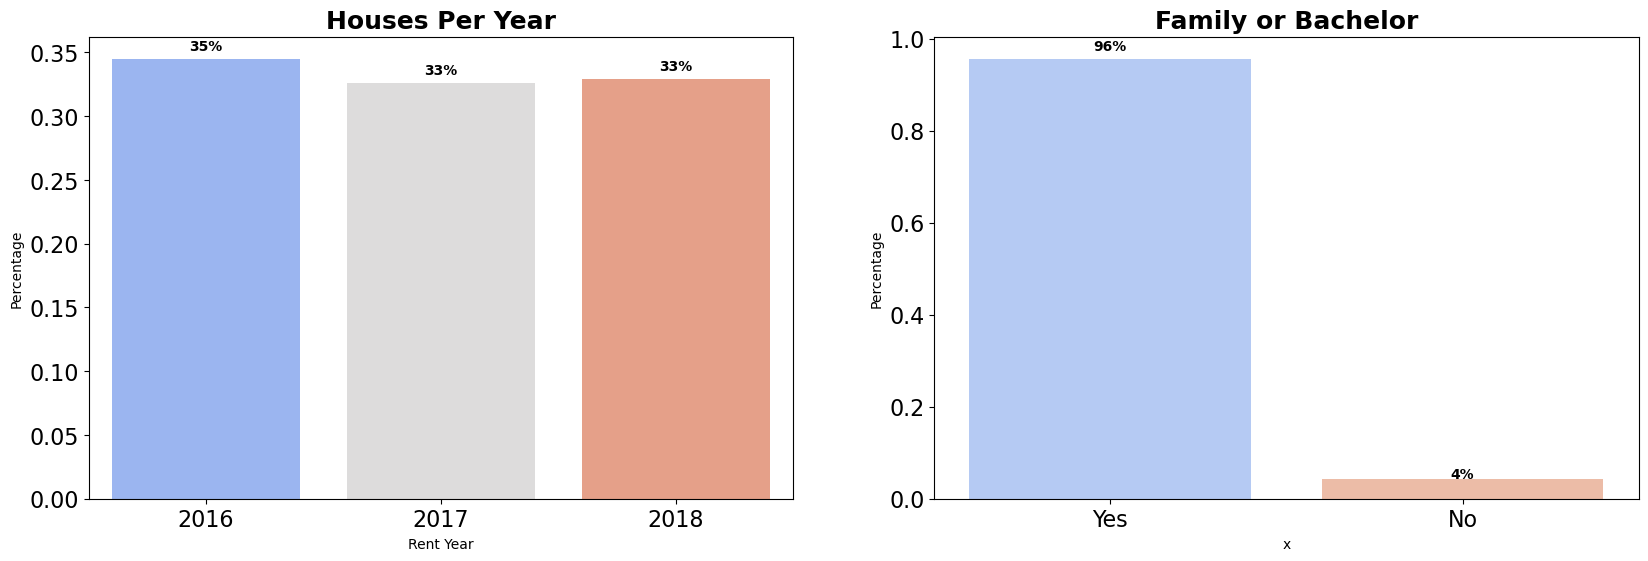

In [7]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['Rent Year'].value_counts(normalize = True).rename_axis('Rent Year').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Rent Year', y = 'Percentage', data = eda_percentage, palette = 'coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Houses Per Year', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Family or Bachelor'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Family or Bachelor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

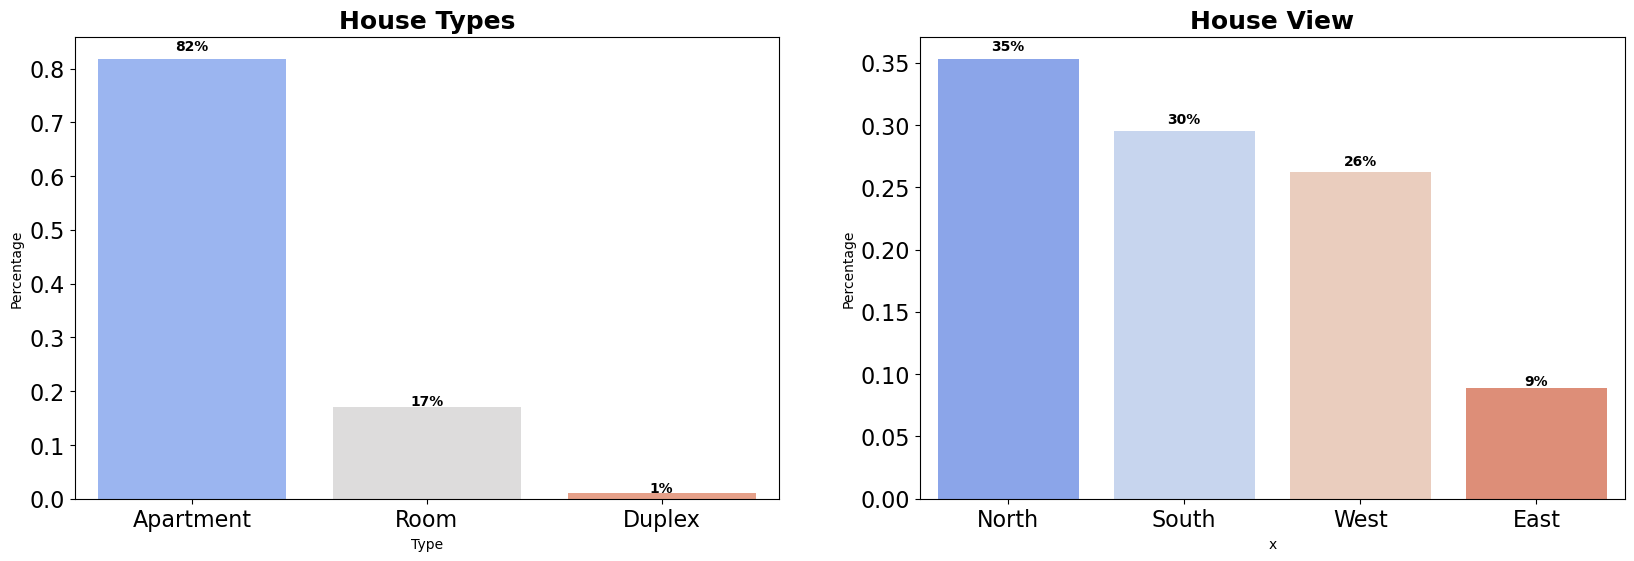

In [8]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['Type'].value_counts(normalize = True).rename_axis('Type').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Type', y = 'Percentage', data = eda_percentage, palette = 'coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('House Types', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['View'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette = 'coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('House View', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

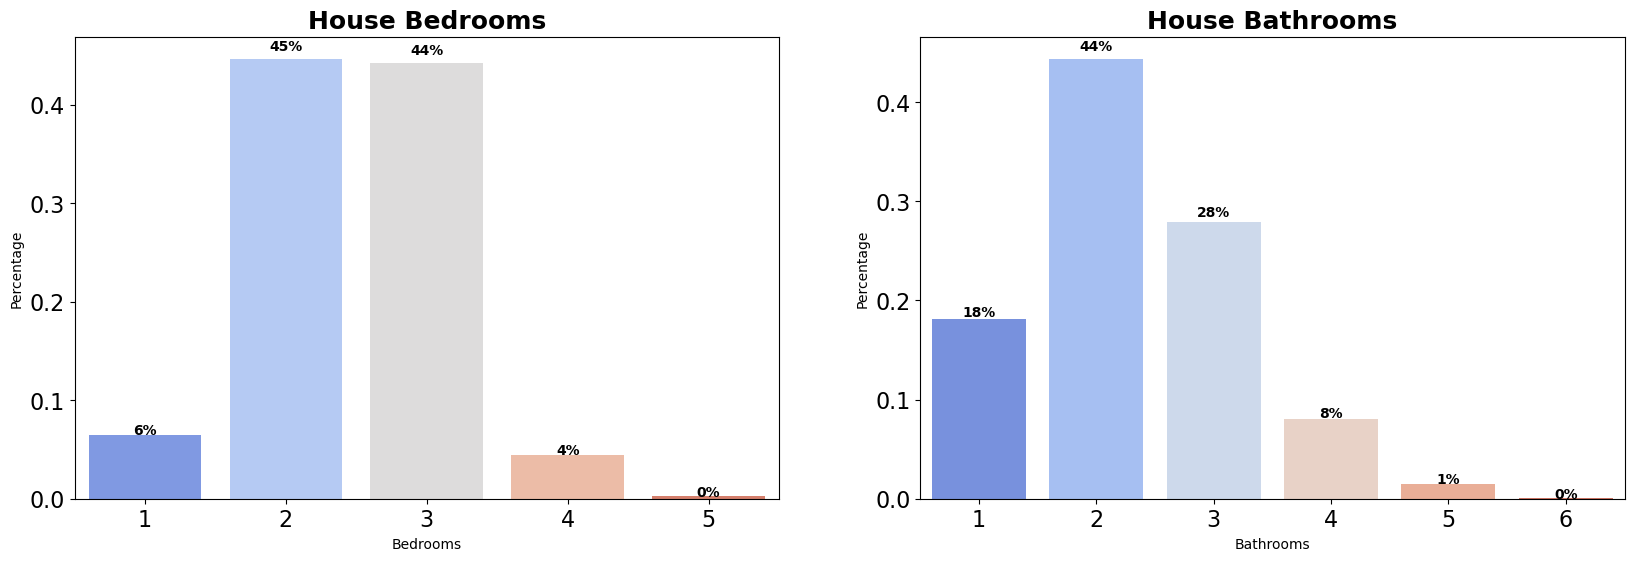

In [9]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Bedrooms'].value_counts(normalize = True).rename_axis('Bedrooms').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Bedrooms', y = 'Percentage', data = eda_percentage, palette = 'coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('House Bedrooms', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Bathrooms'].value_counts(normalize = True).rename_axis('Bathrooms').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Bathrooms', y = 'Percentage', data = eda_percentage, palette = 'coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('House Bathrooms', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [272]:
df['Parking Space'].value_counts(normalize = True)

Parking Space
Yes    0.628198
No     0.371802
Name: proportion, dtype: float64

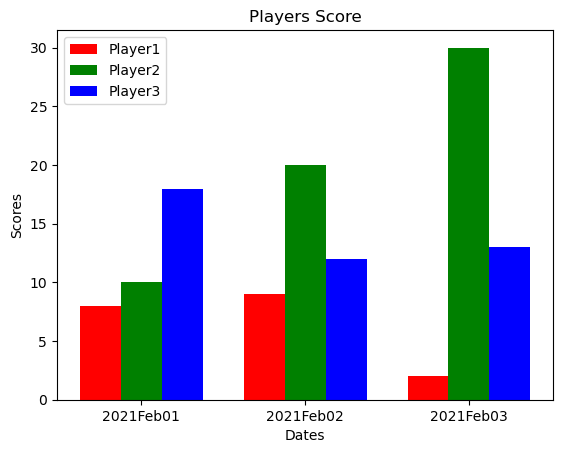

In [6]:
N = 3
ind = np.arange(N)  
width = 0.25
  
xvals = [8, 9, 2] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = [10, 20, 30] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = [18, 12, 13] 
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.xlabel("Dates") 
plt.ylabel('Scores') 
plt.title("Players Score") 
  
plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03']) 
plt.legend( (bar1, bar2, bar3), ('Player1', 'Player2', 'Player3') ) 
plt.show() 

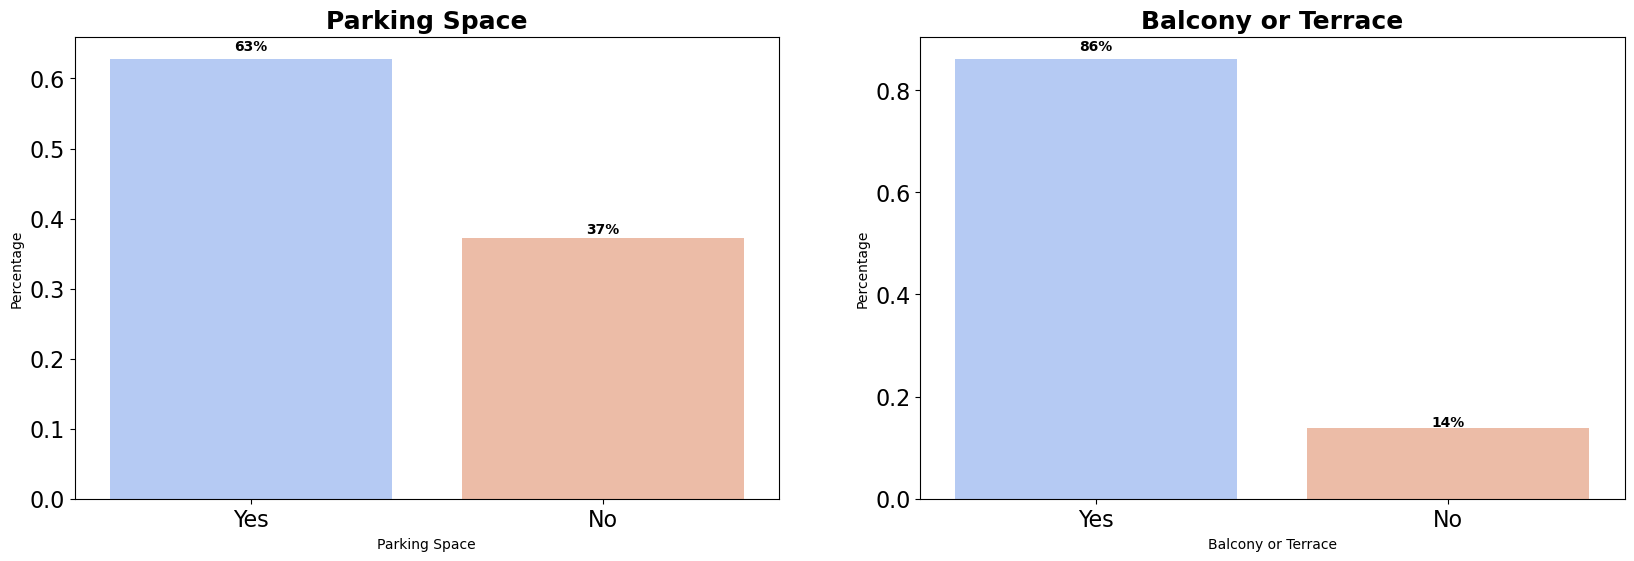

In [11]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Parking Space'].value_counts(normalize = True).rename_axis('Parking Space').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Parking Space', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Parking Space', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Balcony or Terrace'].value_counts(normalize = True).rename_axis('Balcony or Terrace').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Balcony or Terrace', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Balcony or Terrace', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

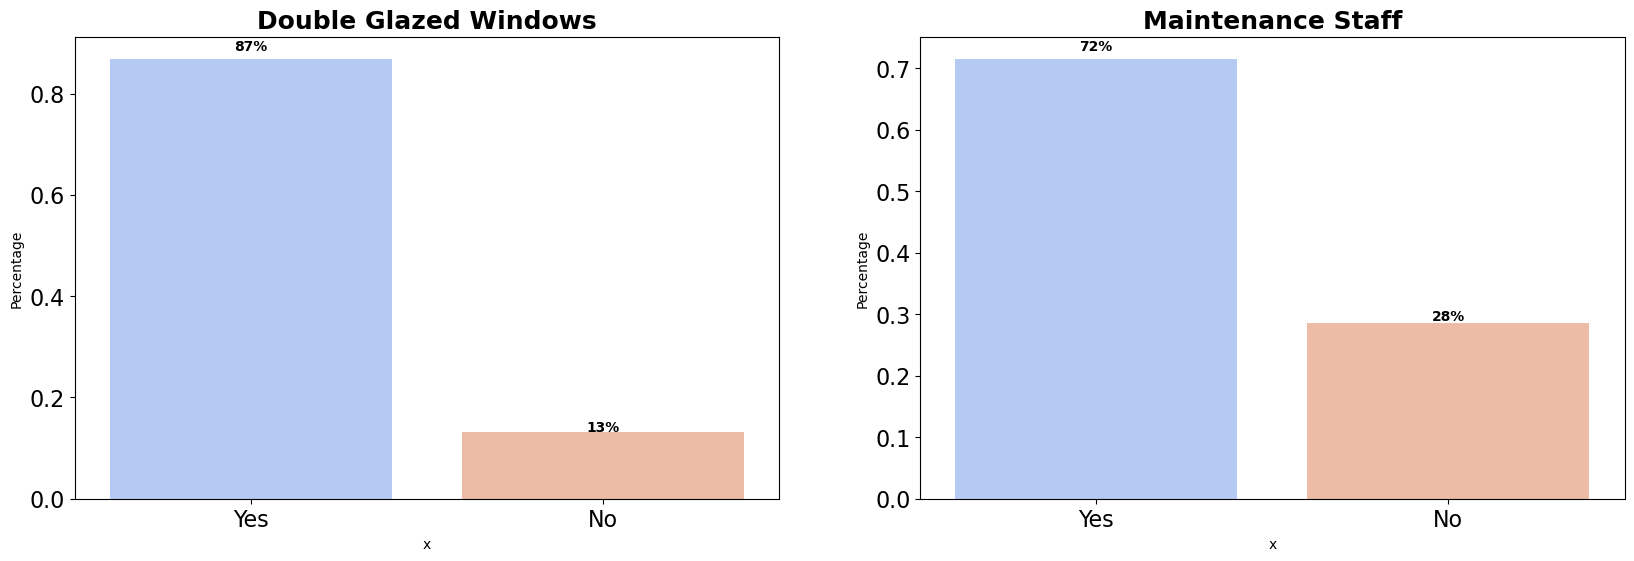

In [10]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Double Glazed Windows'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Double Glazed Windows', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Maintenance Staff'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Maintenance Staff', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

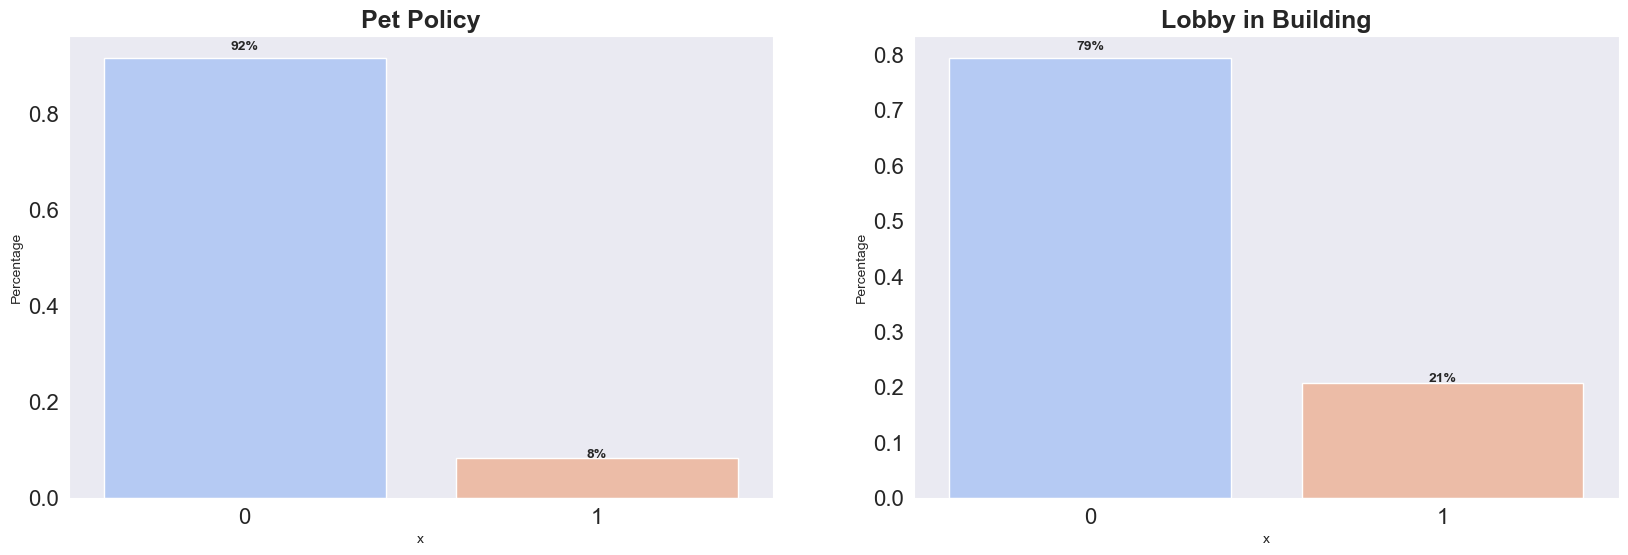

In [216]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
eda_percentage = df['Pet Policy'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Pet Policy', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
eda_percentage = df['Lobby in Building'].value_counts(normalize = True).rename_axis('x').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'x', y = 'Percentage', data = eda_percentage, palette='coolwarm')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Lobby in Building', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [12]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

PRICE :[ 17000  12000  24000  13720  32000  25000  16000  15000  14000  40000
   9000   8000  11000  13000  18000  20000  23000  26000  13500  17800
  45000  14500  19000  11500   7500  16500  12500  28000  22000  27000
  46000  35000  70000  10000  34000   6000   9900  20500   8500  10500
   9500  21000  17500   6500  50000  11800  55000  30000  85000   4000
  80000  15500  31000  66000  39500  25500  21500  15100  70500  75500
  75000 100000  65000  24500  37000  38000  33000   7000   6200  18500
   5000  60000  18150   5500  36000  17700 120000  49000  56000  82000
  44500  49500  29000  35500  42000 150000  67000  41000  57000   4700
  19500  23500  47000 106000  14100  52000  44000  48000  16300  60500
  77000   8700  40500  15400  22500  30500 180000  32500  13800  95000
  96000  45500  90000 110000  13300  78000  11200 250000   7150  33500
   9700  27500  19600  25600  20800 130000  15800 105000  54000 300000
   9800   7800  12200   9300  28500   8800  25003] 
STREET :['Section 

- Now, we are going to see the data correlation
- We have to encode the categorical data 
- We can see we have all the columns type object except the columns Price, Beedrooms, Bathrooms, Size and Rent Year
- We also have values Yes, No, North, Apartment which makes easier encode the values

In [157]:
from sklearn.preprocessing import LabelEncoder
object_cols = filter(lambda x: x not in ['Price', 'Bedrooms', 'Bathrooms', 'Size(Sq. Ft.)', 'Rent Year'], df.columns)
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

- We are going to do some analysis based on training data

In [163]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [244]:
train_data = X_train.join(y_train)

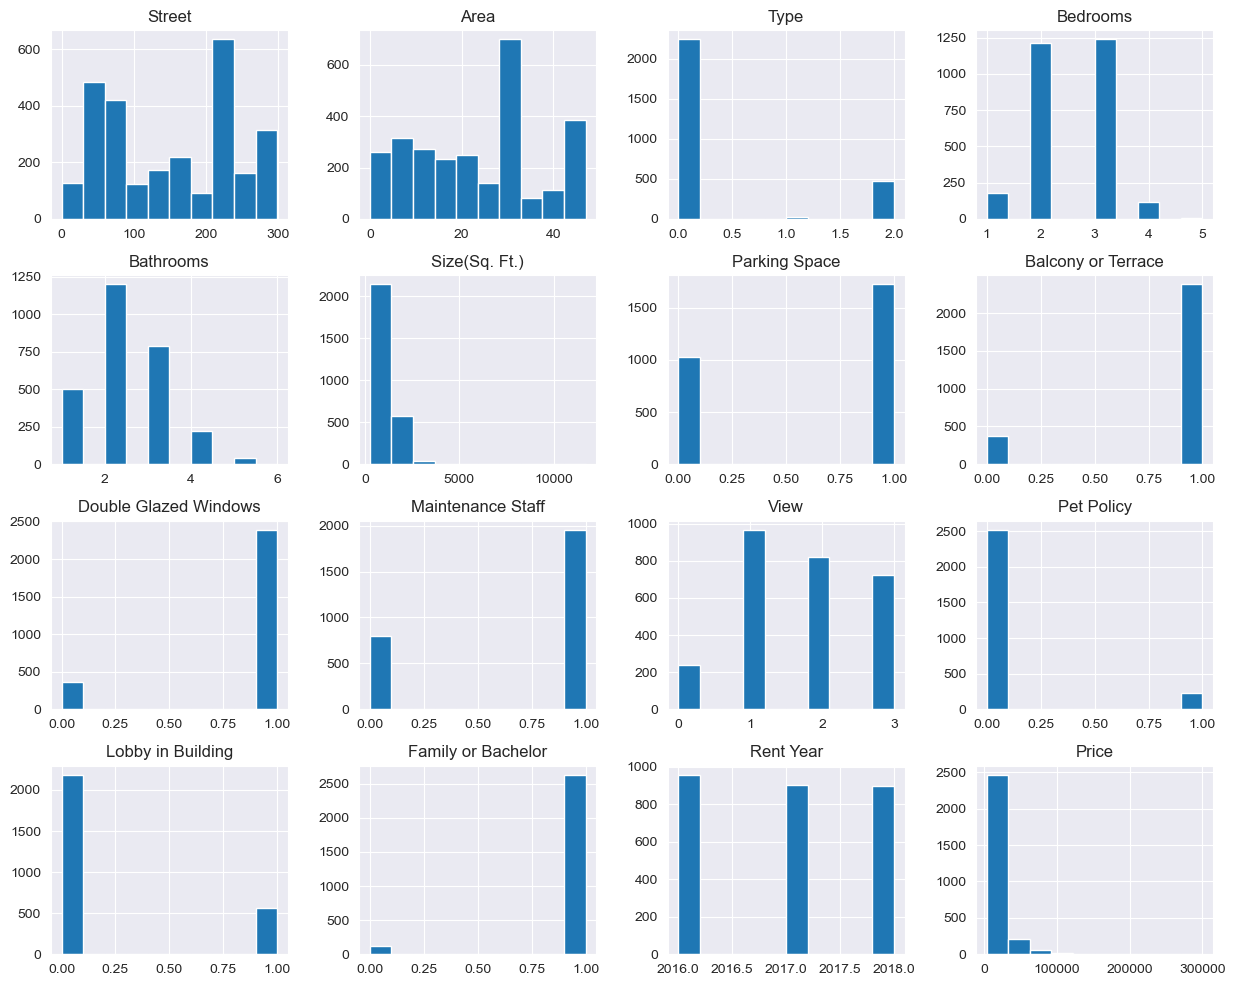

In [245]:
train_data.hist(figsize = (15, 12))
fig.tight_layout()

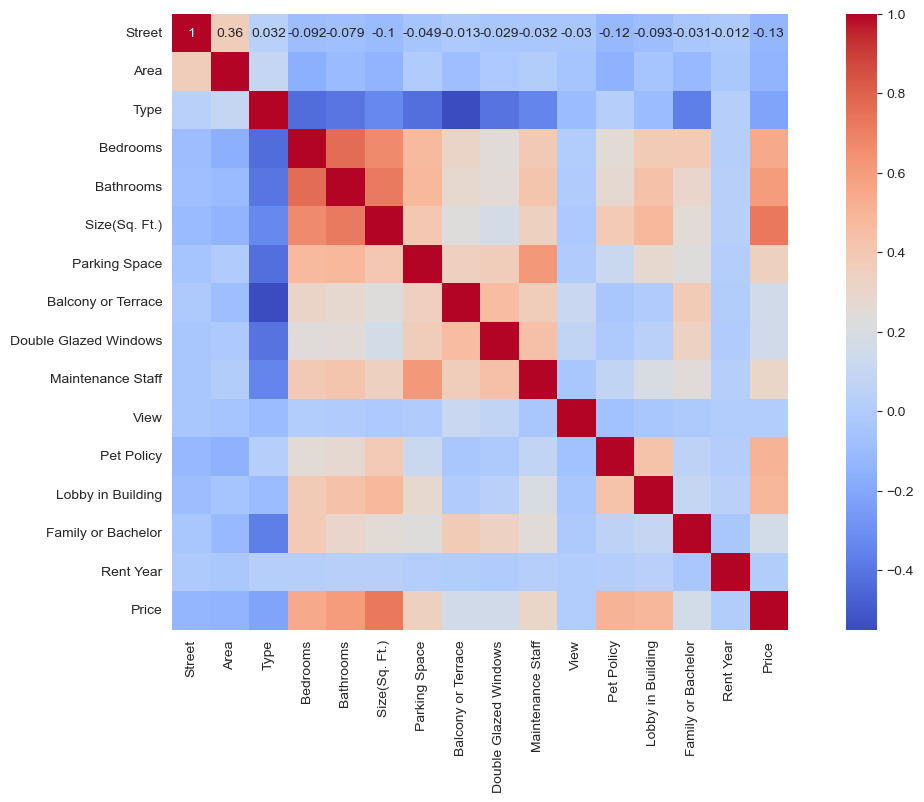

In [247]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', square=True)
fig.tight_layout()

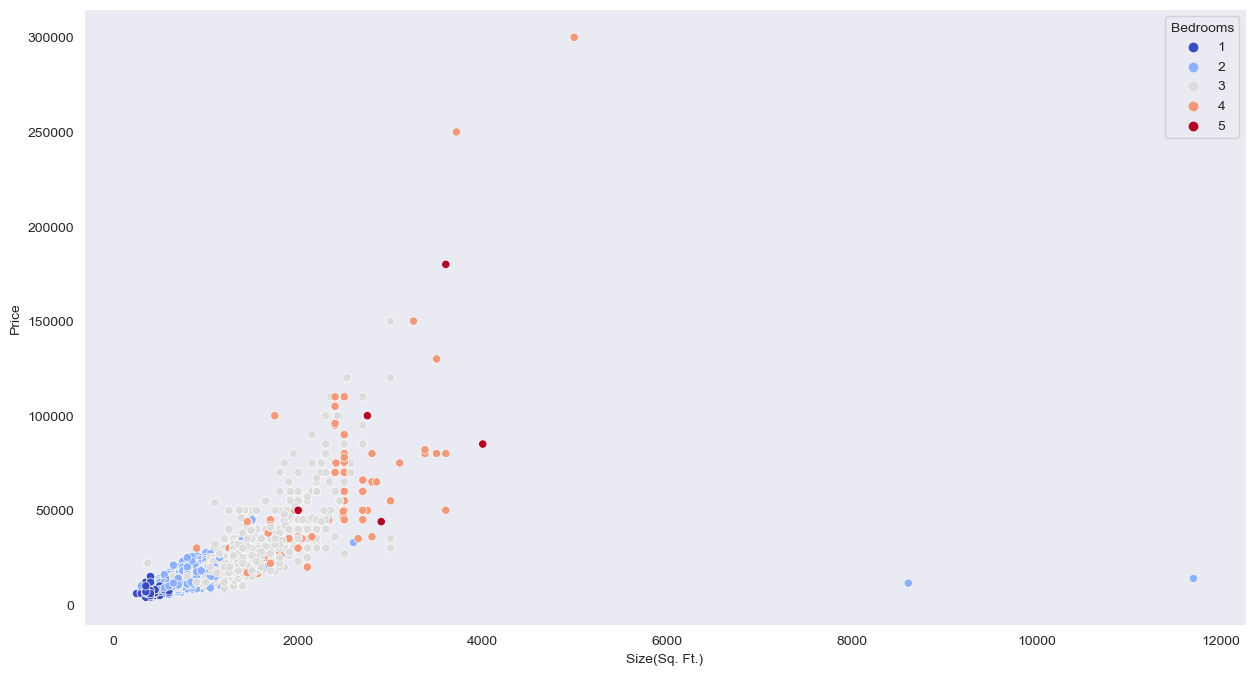

In [248]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Size(Sq. Ft.)', y='Price', data=train_data, hue='Bedrooms', palette='coolwarm')
fig.tight_layout()

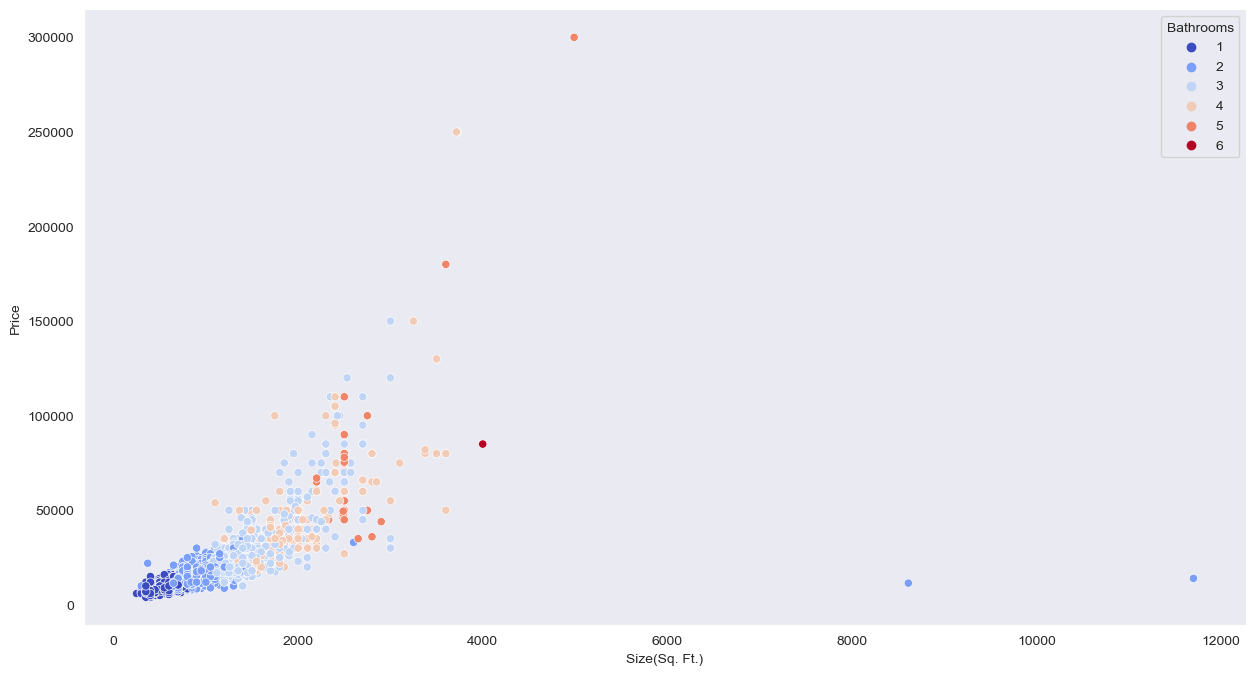

In [249]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Size(Sq. Ft.)', y='Price', data=train_data, hue='Bathrooms', palette='coolwarm')
fig.tight_layout()

<h2 style = "font-family: Comic Sans MS;background-color:#0047AB;padding:10px">Evaluating Models</h2>

In [250]:
X_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']
test_data = X_test.join(y_test)
X_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']

In [234]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression();

linear.fit(X_train, y_train)

LinearRegression()

In [235]:
linear.score(X_test, y_test)

0.733089981609953

In [236]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor();

forest.fit(X_train, y_train)

RandomForestRegressor()

In [240]:
forest.score(X_test, y_test)

0.7683317303271524